### Imports

In [42]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, Model
import keras as k

from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

from keras.initializers import GlorotUniform

from matplotlib import pyplot as plt
import seaborn as sns
import scipy

from datetime import datetime

import pickle

from PIL import Image

from custom_class import *

print(f"pd.__version__: {pd.__version__}")
print(f"tf.__version__: {tf.__version__}")

image_size = (96, 128)

pd.__version__: 2.2.3
tf.__version__: 2.15.1


### Read file path and labels to list

In [ ]:
# dataset_dir = "/home/ppxst5/mlis2_project/Dataset/machine-learning-in-science-ii-2025"
dataset_dir = "/mnt/c/Users/psamt/OneDrive - The University of Nottingham/_Spring/PHYS4036_Machine Learning in Science Part II/Project/Dataset/machine-learning-in-science-ii-2025"
# dataset_dir = "/kaggle/input/machine-learning-in-science-ii-2025"

csv_path = os.path.join(dataset_dir, "training_norm.csv")
csv_df = pd.read_csv(csv_path, index_col="image_id")

training_data_dir = os.path.join(dataset_dir, "training_data", "training_data")

# there is one speed > 1. So change it.
csv_df.loc[csv_df["speed"] > 1, "speed"] = 1

csv_df.drop(columns=["speed"], inplace=True)

display(csv_df)

,angle
image_id,
1,0.4375
2,0.8125
3,0.4375
4,0.6250
5,0.5000
...,...
13794,0.6250
13795,0.4375
13796,0.5625


Check the data

(array([  88.,  197.,  104.,  641., 1467., 3655., 3970., 2123., 1448.,
         100.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

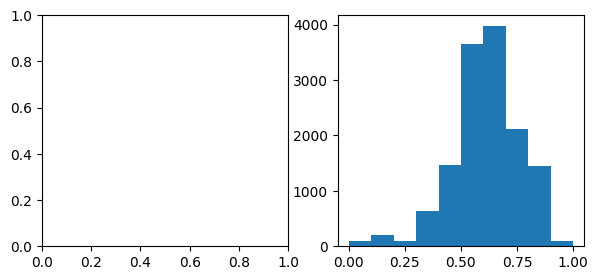

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))
ax[1].hist(csv_df["angle"])

0.00000 60
0.06250 28
0.12500 99
0.18750 98
0.25000 104
0.31250 213
0.37500 428
0.43750 1467
0.50000 2046
0.56250 1609
0.62500 1963
0.68750 2007
0.75000 2123
0.81250 1147
0.87500 301
0.93750 65
1.00000 35
{0.0: 60, 0.0625: 28, 0.125: 99, 0.1875: 98, 0.25: 104, 0.3125: 213, 0.375: 428, 0.4375: 1467, 0.5: 2046, 0.5625: 1609, 0.625: 1963, 0.6875: 2007, 0.75: 2123, 0.8125: 1147, 0.875: 301, 0.9375: 65, 1.0: 35}


<BarContainer object of 17 artists>

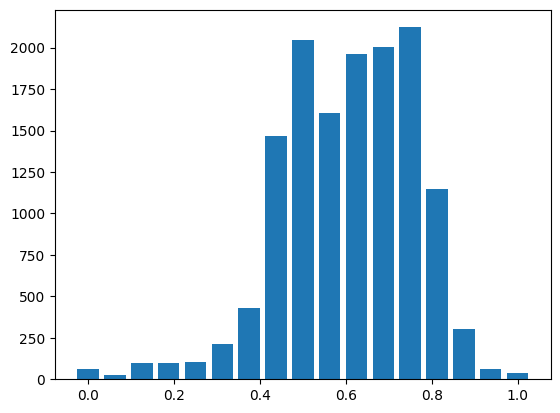

In [45]:
angle = csv_df["angle"]

df = pd.DataFrame(angle)
bins = np.unique(angle)
c = df["angle"].value_counts()

angle_count = {}

for bin in bins:
    angle_count[bin] = c[bin]

key, value = list(angle_count.keys()), list(angle_count.values())

for i in range(len(key)):
    print(f"{key[i]:.5f} {value[i]}")

print(angle_count)

plt.bar(key, value, width=0.05)

In [46]:
# for rs in range(10000):
#     X = np.array(csv_df.index)
#     y = np.array(csv_df['angle'])
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=rs)
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.15/0.85), random_state=rs)

#     # print(X_train.shape)
#     # print(X_val.shape)
#     # print(X_test.shape)
#     # print(X.shape)

#     train_count = pd.Series(y_train).value_counts()
#     train_count = train_count / sum(train_count) * 100
#     # val_count = pd.Series(y_val).value_counts()
#     # val_count = val_count / sum(val_count) * 100
#     # test_count = pd.Series(y_test).value_counts()
#     # test_count = test_count / sum(test_count) * 100

#     ori_count = pd.Series(y).value_counts()
#     ori_count = ori_count / sum(ori_count) * 100

#     diff = (sum(abs(train_count-ori_count)))

#     if (diff < 0.6):
#         print(f"random state: {rs}")
#         print(diff)

#     bar_width = 0.015
#     # plt.bar(val_count.index-bar_width, train_count, width=bar_width)
#     # plt.bar(train_count.index, train_count, width=bar_width)
#     # plt.bar(ori_count.index+bar_width, train_count, width=bar_width)
#     # plt.bar(test_count.index+bar_width, train_count, width=bar_width)

11724 2069


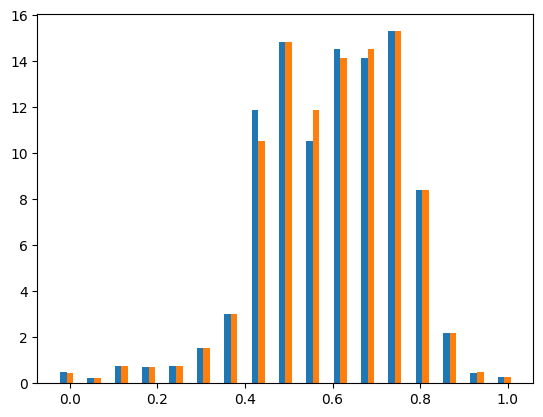

In [47]:
rs = 5705
# rs = 5695
X = np.array(csv_df.index)
y = np.array(csv_df["angle"])
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.15, random_state=rs
# )
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=(0.15 / 0.85), random_state=rs
# )
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=rs
)


train_count = pd.Series(y_train).value_counts()
train_count = train_count / sum(train_count) * 100
val_count = pd.Series(y_val).value_counts()
val_count = val_count / sum(val_count) * 100
# test_count = pd.Series(y_test).value_counts()
# test_count = test_count / sum(test_count) * 100

ori_count = pd.Series(y).value_counts()
ori_count = ori_count / sum(ori_count) * 100

diff = sum(abs(train_count - ori_count))

if diff < 0.7:
    print(f"random state: {rs}")
    print(diff)

bar_width = 0.015
plt.bar(val_count.index - bar_width, train_count, width=bar_width)
plt.bar(train_count.index, train_count, width=bar_width)
# plt.bar(ori_count.index+bar_width, train_count, width=bar_width)
# plt.bar(test_count.index + bar_width, train_count, width=bar_width)

print(len(X_train), len(X_val))

In [48]:
train_count = pd.Series(y_train).value_counts().sort_index()
train_total = np.sum(train_count)

weight = train_total / (len(train_count) * train_count)
weight = weight / min(weight)

print(weight)


lower, upper = (0, 5)
threshold = 12

def tune_weight(x):
  if x < lower:
    return lower
  elif x < threshold:
    # return 1.0
    return float(x / 1.1)
  else:
    return float(upper)

weight = weight.apply(tune_weight)
weight.iloc[5] = upper/2
weight.iloc[-3] = upper/4
weight.iloc[-1] = upper*1.5
weight.iloc[1] = upper*3
weight.iloc[6] = weight.iloc[6]
# weight.iloc[6] = weight.iloc[6] * 1.3
weight.iloc[-3:-1] = weight.iloc[-3:-1] * 1.5


# weight = weight.apply(lambda x: upper if x > upper else x)
# weight = weight.apply(lambda x: lower if x < lower else x)


p_for_random_choice = weight[y_train].values

p_for_random_choice = p_for_random_choice / sum(p_for_random_choice)

print(weight)

0.0000    35.880000
0.0625    71.760000
0.1250    20.860465
0.1875    21.105882
0.2500    20.620690
0.3125     9.857143
0.3750     5.067797
0.4375     1.452632
0.5000     1.032221
0.5625     1.286022
0.6250     1.081374
0.6875     1.053435
0.7500     1.000000
0.8125     1.825025
0.8750     6.980545
0.9375    29.900000
1.0000    57.870968
Name: count, dtype: float64
0.0000     5.000000
0.0625    15.000000
0.1250     5.000000
0.1875     5.000000
0.2500     5.000000
0.3125     2.500000
0.3750     4.607088
0.4375     1.320574
0.5000     0.938383
0.5625     1.169110
0.6250     0.983068
0.6875     0.957668
0.7500     0.909091
0.8125     1.659114
0.8750     1.875000
0.9375     7.500000
1.0000     7.500000
Name: count, dtype: float64


In [49]:
# # Define generator for weighted sampling
# def sample_generator(X, y, sample_probs):
#     idx = np.random.choice(len(y), p=sample_probs)  # Sample index
#     return X[idx], y[idx]


# X_train_os = []
# y_train_os = []

# for i in range(10240):
#     X_sampled, y_sampled = sample_generator(X_train, y_train, p_for_random_choice)
#     X_train_os.append(X_sampled)
#     y_train_os.append(y_sampled)

# # for i in range(10):
# #     print(X_train_os[i], y_train_os[i])
# #     print(csv_df.loc[X_train_os[i]]['angle'])

# # print(pd.Series(y_train).value_counts().sort_index())

# # print(pd.Series(y_train_os).value_counts().sort_index())

# y_train_os_count = pd.Series(y_train_os).value_counts().sort_index()

# plt.bar(list(y_train_os_count.index), y_train_os_count, width=0.04)
# plt.title("Over sampled")

In [50]:
sample_probs_tensor = tf.constant(p_for_random_choice, dtype=tf.float32)

X_train_tensor = tf.constant(X_train, dtype=tf.int32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)

NUM_SAMPLES = 64*200

def sample_indices():
    return tf.random.categorical(tf.math.log([sample_probs_tensor]), NUM_SAMPLES)[0]

sampled_indices = sample_indices()

X_train_os = tf.gather(X_train_tensor, sampled_indices)
y_train_os = tf.gather(y_train_tensor, sampled_indices)

train_ds = tf.data.Dataset.from_tensor_slices((X_train_os, y_train_os))

print(NUM_SAMPLES)

12800


In [51]:
ids = []
angles = []
for id, angle in train_ds:
    ids.append(id.numpy())
    angles.append(angle.numpy())

Text(0.5, 1.0, 'Distribution of angles after oversampling')

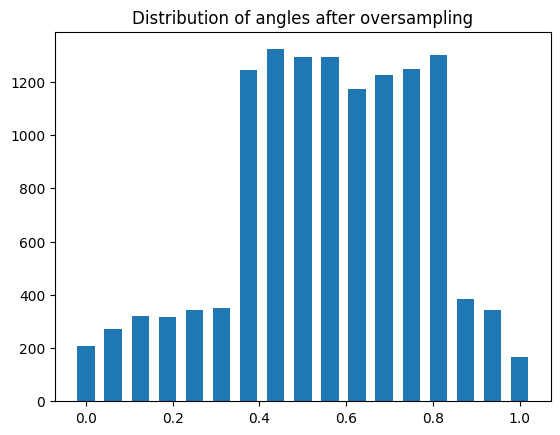

In [52]:
y_count = pd.Series(angles).value_counts().sort_index()
plt.bar(y_count.index, y_count, width=0.04)
plt.title("Distribution of angles after oversampling")

In [53]:
# X_train_os_path = [
#     os.path.join(training_data_dir, str(image_id) + ".png") for image_id in X_train_os
# ]
X_val_path = [
    os.path.join(training_data_dir, str(image_id) + ".png") for image_id in X_val
]

In [54]:
def decode_img(
    img,
):  # -> Any | defaultdict | Any | list | None | object | Tensor | ...:
    # Convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img

def process_path(file_path, angle):
    # Load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, angle

def image_id_to_path(image_id, angle):
    image_path = tf.strings.join([training_data_dir, '/', tf.as_string(image_id), ".png"])  # Assuming images are .jpg
    return image_path, angle

In [55]:
# train_ds = tf.data.Dataset.from_tensor_slices((X_train_os_path, y_train_os))
train_ds = tf.data.Dataset.from_tensor_slices((X_train_os, y_train_os))
train_ds = train_ds.map(image_id_to_path, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((X_val_path, y_val))

train_ds = train_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)

train_ds_length = tf.data.experimental.cardinality(train_ds).numpy()
print(train_ds_length)
val_ds_length = tf.data.experimental.cardinality(val_ds).numpy()
print(val_ds_length)

12800
2069


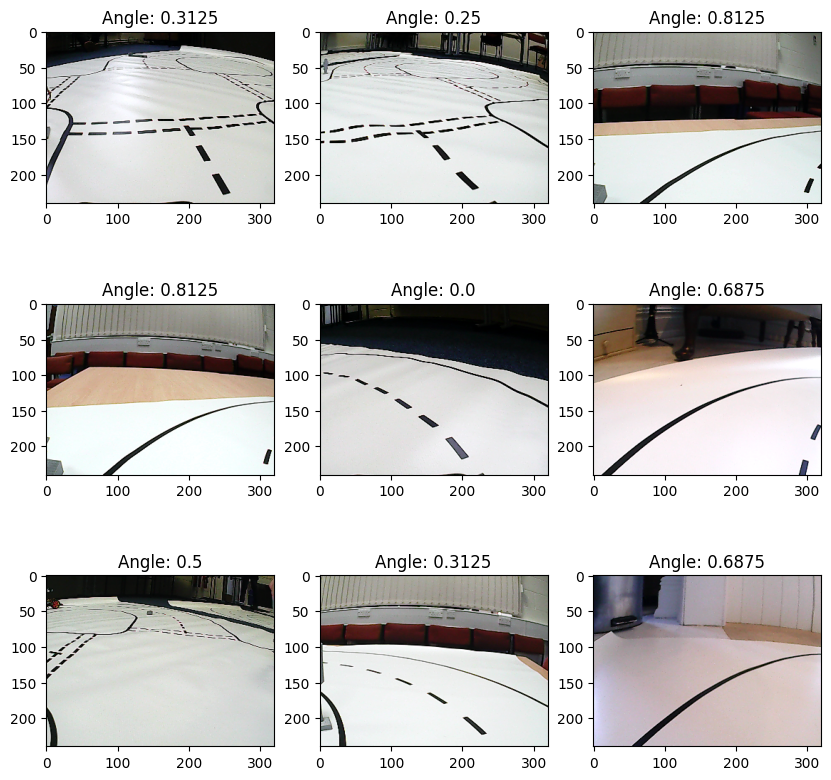

In [56]:
plt.figure(figsize=(10, 10))
i = 0

for image, angle in train_ds.take(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("float32"))
    angle = angle.numpy()
    plt.title(f"Angle: {angle}")
    i += 1

In [57]:
def visualise(original, augmented):
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.title("Original image")
    plt.imshow(original.numpy().astype("float32"))

    plt.subplot(1, 2, 2)
    plt.title("Augmented image")
    plt.imshow(augmented.numpy().astype("float32"))

In [58]:
rotate_by_degree = 5
random_rotate = keras.layers.RandomRotation(rotate_by_degree / 360)


def augment(image, angle, seed=None):
    # Deal with the random seed
    if seed == None:
        seed = tf.random.uniform(shape=[2], maxval=10000, dtype=tf.int32)
    else:
        seed = tf.constant([seed, seed], dtype=tf.int32)

    image = tf.image.stateless_random_brightness(image, 0.3, seed)
    image = tf.image.stateless_random_contrast(image, 0.75, 1.25, seed)
    image = tf.image.stateless_random_hue(image, 0.05, seed)
    image = tf.image.stateless_random_saturation(image, 0.7, 1.2, seed)
    image = tf.image.stateless_random_jpeg_quality(image, 80, 100, seed)

    image = random_rotate(image)

    # crop image
    image = tf.image.stateless_random_crop(image, size=[210, 280, 3], seed=seed)

    # resize image back to 240x320
    image = tf.image.resize(image, [240, 320])

    return image, angle

Test augment function

20
Augmented image shape: (240, 320, 3)


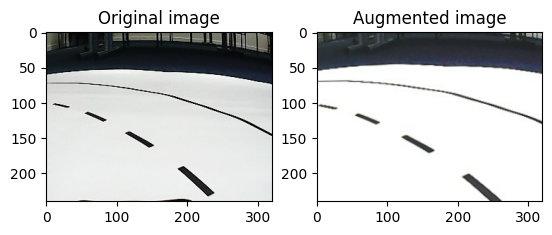

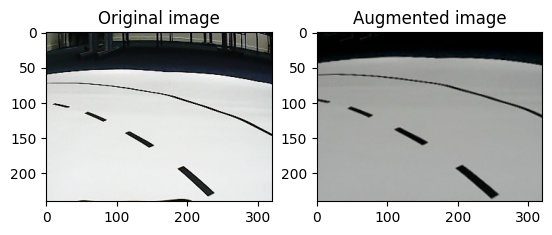

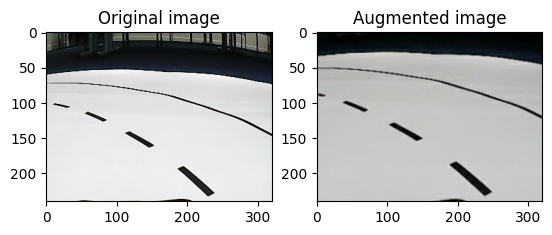

In [59]:
skip = 20
# skip+=1
print(skip)
for i in range(3):
    for image, angle in train_ds.skip(skip).take(1):
        augmented_image, angle = augment(image, angle, None)
        visualise(image, augmented_image)

for image, angle in train_ds.take(1):
    aug_image, aug_angle = augment(image, angle)
    print(f"Augmented image shape: {aug_image.shape}")

In [60]:
train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

In [61]:
# def enhance_red(image, speed):
#     r, g, b = tf.split(image, num_or_size_splits=3, axis=-1)
#     r_mask = tf.logical_and((r*0.9 > g), (r*0.9 > b))
#     g_mask = tf.logical_and((g > r), (g > b))
#     b_mask = tf.logical_and((b > r), (b > g))
#     r = tf.where(r_mask, tf.clip_by_value(r * 1.5, 0.0, 1.0), r)
#     # g = g**2
#     # b = b**2
#     image = tf.concat([r, g, b], axis=-1)
#     return image, speed

# trian_ds = train_ds.map(enhance_red, num_parallel_calls=tf.data.AUTOTUNE)
# val_ds = val_ds.map(enhance_red, num_parallel_calls=tf.data.AUTOTUNE)

In [62]:
def scale_ds(image, angle):
    # Range of input image: [0, 1]
    return image * 2 - 1.0, angle       # [-1, 1]
    # return image * 255, angle               # [0, 255]


train_ds = train_ds.map(scale_ds, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(scale_ds, num_parallel_calls=tf.data.AUTOTUNE)

In [63]:
print(image_size[0], image_size[1])

def resize_ds(image, angle):
    return tf.image.resize(image, [image_size[0], image_size[1]]), angle

train_ds = train_ds.map(resize_ds, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(resize_ds, num_parallel_calls=tf.data.AUTOTUNE)

96 128


In [64]:
def rephrase_ds(image, angle):
    # return image, {"angle_output": angle}
    angle_dict = {}
    for i in range(10):
        angle_dict[f"angle{i}_output"] = angle

    return image, angle_dict



train_ds = train_ds.map(rephrase_ds, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(rephrase_ds, num_parallel_calls=tf.data.AUTOTUNE)

In [65]:
batch_size = 64


def configure_for_performance(ds, shuffle: bool, batch: bool):
    if shuffle:
        ds = ds.shuffle(buffer_size=3000)
    if batch:
        ds = ds.batch(batch_size, drop_remainder=True)
    else:
        ds = ds.batch(1, drop_remainder=False)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds


train_ds = train_ds.repeat()
val_ds = val_ds.repeat()
train_ds = configure_for_performance(train_ds, shuffle=True, batch=True)
val_ds = configure_for_performance(val_ds, shuffle=False, batch=True)

### Build model

In [66]:
image_shape = (image_size[0], image_size[1], 3)

base_model = keras.applications.MobileNetV3Large(
    include_top=False,
    weights="imagenet",
    input_shape=image_shape,
    pooling=None,
    include_preprocessing=False, 
)
base_model.trainable = False

extracted_base_model = Model(
            inputs=base_model.input,
            outputs=base_model.get_layer('expanded_conv_14/Add').output
        )

my_base_model = base_model

print(my_base_model.output.shape)

(None, 3, 4, 960)


In [67]:
feature_extractor = my_base_model.output

print(feature_extractor.shape)

a_model = []

output_activation_1 = 'sigmoid'
output_activation_2 = 'linear'


# model 0
i = 0

a = feature_extractor
a = layers.Conv2D(128, (3, 3), (2, 2), padding='same', 
                  kernel_initializer='he_uniform', name=f'a{i}_conv_2')(feature_extractor)
a = layers.BatchNormalization(name=f'a{i}_bn_2')(a)
a = layers.Activation('relu', name=f'a{i}_relu_2')(a)
a = layers.GlobalAveragePooling2D(name=f'a{i}_GAP')(a)
a = layers.Dense(512, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_2')(a)
a = layers.Dropout(0.3, name=f'a{i}_dropout_2')(a)
a = layers.Dense(128, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_1')(a)
a = layers.Dropout(0.3, name=f'a{i}_dropout')(a)
a = layers.Dense(1, activation=output_activation_1, name=f'a{i}_output')(a)

a_model.append(a)


# model 1
i += 1

a = feature_extractor
a = layers.Conv2D(496, (3, 3), (2, 2), padding='same', 
                  kernel_initializer='he_uniform', name=f'a{i}_conv_1')(feature_extractor)
a = layers.BatchNormalization(name=f'a{i}_bn_1')(a)
a = layers.Activation('relu', name=f'a{i}_relu_1')(a)
a = layers.Conv2D(96, (3, 3), (2, 2), padding='same', 
                  kernel_initializer='he_uniform', name=f'a{i}_conv_2')(a)
a = layers.BatchNormalization(name=f'a{i}_bn_2')(a)
a = layers.Activation('relu', name=f'a{i}_relu_2')(a)
a = layers.Flatten(name=f'a{i}_flatten')(a)
a = layers.Dense(128, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_1')(a)
a = layers.Dropout(0.3, name=f'a{i}_dropout')(a)
a = layers.Dense(1, activation=output_activation_1, name=f'a{i}_output')(a)

a_model.append(a)


# model 2
i += 1

a = feature_extractor
a_attention = layers.Conv2D(1, (1, 1), padding='same', activation="sigmoid", name=f'a{i}_attention_conv')(a)
a = layers.Multiply(name=f'a{i}_attention_apply')([a, a_attention])
a = layers.Conv2D(128, (3, 3), (2, 2), padding='same', 
                  kernel_initializer='he_uniform', name=f'a{i}_conv_1')(a)
a = layers.BatchNormalization(name=f'a{i}_bn_1')(a)
a = layers.Activation('relu', name=f'a{i}_relu_1')(a)
a = layers.GlobalAveragePooling2D(name=f'a{i}_GAP')(a)
a = layers.Dense(384, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_2')(a)
a = layers.Dropout(0.3, name=f'a{i}_dropout_2')(a)
a = layers.Dense(96, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_1')(a)
a = layers.Dropout(0.3, name=f'a{i}_dropout')(a)
a = layers.Dense(1, activation=output_activation_1, name=f'a{i}_output')(a)

a_model.append(a)


# model 3
i += 1

a = feature_extractor
a = layers.Conv2D(72, (3, 3), (2, 2), padding='same', name=f'a{i}_conv_1')(a)
a = layers.BatchNormalization(name=f'a{i}_bn_1')(a)
a = layers.Activation('relu', name=f'a{i}_relu_1')(a)
a = layers.Flatten(name=f'a{i}_flatten')(a)
a = layers.Dense(512, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_2')(a)
a = layers.Dropout(0.4, name=f'a{i}_dropout_2')(a)
a = layers.Dense(32, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_1')(a)
a = layers.Dropout(0.1, name=f'a{i}_dropout')(a)
a = layers.Dense(1, activation=output_activation_1, name=f'a{i}_output')(a)

a_model.append(a)


# model 4
i += 1

a = feature_extractor
a_attention = layers.Conv2D(1, (1, 1), padding='same', activation="sigmoid", name=f'a{i}_attention_conv')(a)
a = layers.Multiply(name=f'a{i}_attention_apply')([a, a_attention])

# # Spatial pyramid pooling
# pool1 = layers.AveragePooling2D(pool_size=(1, 1), name=f'a{i}_pool_1')(a)  # Full size
# pool2 = layers.AveragePooling2D(pool_size=(2, 2), name=f'a{i}_pool_2')(a)
# up1 = layers.UpSampling2D(size=(1, 1), name=f'a{i}_up_1')(pool1)
# up2 = layers.UpSampling2D(size=(2, 2), name=f'a{i}_up_2')(pool2)
# a = layers.Concatenate(name=f'a{i}_concat')([up1, up2])

# a_up = a

# Conv to reduce channels
a = layers.Conv2D(64, (3, 3), padding='same', name=f'a{i}_conv_1')(a)
a = layers.BatchNormalization(name=f'a{i}_bn_1')(a)
a = layers.Activation('relu', name=f'a{i}_relu_1')(a)
a = layers.GlobalAveragePooling2D(name=f'a{i}_GAP')(a)

# Dense layers
a = layers.Dense(128, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_1')(a)
a = layers.Dropout(0.3, name=f'a{i}_dropout')(a)
a = layers.Dense(1, activation=output_activation_1, name=f'a{i}_output')(a)

a_model.append(a)



# model 5
i += 1

a = feature_extractor
# # Spatial pyramid pooling
# pool1 = layers.AveragePooling2D(pool_size=(1, 1), name=f'a{i}_pool_1')(a)  # Full size
# pool2 = layers.AveragePooling2D(pool_size=(2, 2), name=f'a{i}_pool_2')(a)
# up1 = layers.UpSampling2D(size=(1, 1), name=f'a{i}_up_1')(pool1)
# up2 = layers.UpSampling2D(size=(2, 2), name=f'a{i}_up_2')(pool2)
# a = layers.Concatenate(name=f'a{i}_concat')([up1, up2])

# a_up = a

# Conv to reduce channels
a = layers.Conv2D(64, (3, 3), padding='same', name=f'a{i}_conv_1')(a)
a = layers.BatchNormalization(name=f'a{i}_bn_1')(a)
a = layers.Activation('relu', name=f'a{i}_relu_1')(a)
a = layers.GlobalAveragePooling2D(name=f'a{i}_GAP')(a)

# Dense layers
a = layers.Dense(128, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_1')(a)
a = layers.Dropout(0.3, name=f'a{i}_dropout')(a)
a = layers.Dense(1, activation=output_activation_1, name=f'a{i}_output')(a)

a_model.append(a)


# model 6
i += 1

a = feature_extractor
a = layers.Conv2D(96, (3, 3), (2, 2), padding='same', 
                  kernel_initializer='he_uniform', name=f'a{i}_conv_1')(a)
a = layers.BatchNormalization(name=f'a{i}_bn_1')(a)
a = layers.Activation('relu', name=f'a{i}_relu_1')(a)
a = layers.Flatten(name=f'a{i}_flatten')(a)
a = layers.Dense(512, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_2')(a)
a = layers.Dropout(0.5, name=f'a{i}_dropout_2')(a)
a = layers.Dense(86, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_1')(a)
a = layers.Dropout(0.3, name=f'a{i}_dropout')(a)
a = layers.Dense(1, activation=output_activation_1, name=f'a{i}_output')(a)

a_model.append(a)



# model 7
i += 1

a = feature_extractor
a = layers.Conv2D(64, (3, 3), (2, 2), padding='same', 
                  kernel_initializer='he_uniform', name=f'a{i}_conv_1')(a)
a = layers.BatchNormalization(name=f'a{i}_bn_1')(a)
a = layers.Activation('relu', name=f'a{i}_relu_1')(a)
a = layers.Flatten(name=f'a{i}_flatten')(a)
a = layers.Dense(468, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_2')(a)
a = layers.Dropout(0.5, name=f'a{i}_dropout_2')(a)
a = layers.Dense(64, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_1')(a)
a = layers.Dropout(0.5, name=f'a{i}_dropout')(a)
a = layers.Dense(1, activation=output_activation_1, name=f'a{i}_output')(a)

a_model.append(a)


# model 8
i += 1

a = feature_extractor
a_attention = layers.Conv2D(1, (1, 1), padding='same', activation="sigmoid", name=f'a{i}_attention_conv')(a)
a = layers.Multiply(name=f'a{i}_attention_apply')([a, a_attention])
a = layers.Conv2D(64, (3, 3), (2, 2), padding='same', 
                  kernel_initializer='he_uniform', name=f'a{i}_conv_1')(a)
a = layers.BatchNormalization(name=f'a{i}_bn_1')(a)
a = layers.Activation('relu', name=f'a{i}_relu_1')(a)
a = layers.Flatten(name=f'a{i}_attention_flatten')(a)
a = layers.Dense(512, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_2')(a)
a = layers.Dropout(0.5, name=f'a{i}_dropout_2')(a)
a = layers.Dense(64, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_1')(a)
a = layers.Dropout(0.5, name=f'a{i}_dropout')(a)
a = layers.Dense(1, activation=output_activation_1, name=f'a{i}_output')(a)

a_model.append(a)



# model 9
i += 1

a = feature_extractor
a = layers.Conv2D(86, (3, 3), (2, 2), padding='same', 
                  kernel_initializer='he_uniform', name=f'a{i}_conv_1')(a)
a = layers.BatchNormalization(name=f'a{i}_bn_1')(a)
a = layers.Activation('relu', name=f'a{i}_relu_1')(a)
a_attention = layers.Conv2D(1, (1, 1), padding='same', activation="sigmoid", name=f'a{i}_attention_conv')(a)
a = layers.Multiply(name=f'a{i}_attention_apply')([a, a_attention])
a = layers.Flatten(name=f'a{i}_flatten')(a)
a = layers.Dense(168, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_2')(a)
a = layers.Dropout(0.5, name=f'a{i}_dropout_2')(a)
a = layers.Dense(32, activation='relu', kernel_initializer='he_uniform', name=f'a{i}_dense_1')(a)
a = layers.Dropout(0.3, name=f'a{i}_dropout')(a)
a = layers.Dense(1, activation=output_activation_1, name=f'a{i}_output')(a)

a_model.append(a)



outputs_dict = {}
loss_dict = {}
metrics_dict = {}

for i in range(len(a_model)):
    outputs_dict[f'angle{i}_output'] = a_model[i]
    loss_dict[f'angle{i}_output'] = 'mse'
    metrics_dict[f'angle{i}_output'] = ['mae']


model = Model(inputs=my_base_model.input, outputs=outputs_dict, name="my_model")

learning_rate = 0.0010

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss=loss_dict,
    metrics=metrics_dict,
)

# model.summary()

(None, 3, 4, 960)


In [68]:
sub_model = Model(inputs=feature_extractor, outputs=outputs_dict, 
                                                    name="my_model")
tf.keras.utils.plot_model(
    sub_model,
    show_shapes=True,  # Show input/output shapes
    show_layer_names=True,  # Show layer names (e.g., "angle_hidden_2")
    expand_nested=False,  # Keep it flat (no base_model nesting)
    show_layer_activations=True,
    dpi=96,  # Image resolution
)

print("Saved model image: model.png")

Saved model image: model.png


In [69]:
def lr_schedule(epoch, lr):
    initial_lr = learning_rate
    if epoch == 0:
        # return 0.002
        return max(initial_lr * 2, 0.002)
    decay = 0.3
    return initial_lr / (1 + ((epoch-1) // 3) * decay)

for epoch in range(30):
    print(f"Epoch {epoch+1:2d}: {lr_schedule(epoch, 0):.6f}")

Epoch  1: 0.002000
Epoch  2: 0.001000
Epoch  3: 0.001000
Epoch  4: 0.001000
Epoch  5: 0.000769
Epoch  6: 0.000769
Epoch  7: 0.000769
Epoch  8: 0.000625
Epoch  9: 0.000625
Epoch 10: 0.000625
Epoch 11: 0.000526
Epoch 12: 0.000526
Epoch 13: 0.000526
Epoch 14: 0.000455
Epoch 15: 0.000455
Epoch 16: 0.000455
Epoch 17: 0.000400
Epoch 18: 0.000400
Epoch 19: 0.000400
Epoch 20: 0.000357
Epoch 21: 0.000357
Epoch 22: 0.000357
Epoch 23: 0.000323
Epoch 24: 0.000323
Epoch 25: 0.000323
Epoch 26: 0.000294
Epoch 27: 0.000294
Epoch 28: 0.000294
Epoch 29: 0.000270
Epoch 30: 0.000270


### Train model

In [70]:
NUM_OF_EPOCHS = 50

current_epoch = 1

checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=f"checkpoints/model_epoch_{current_epoch:02d}.keras",
    save_weights_only=False,
    save_freq="epoch",
    verbose=1,
)

history_callback = keras.callbacks.History()

# Use this lr_schedule when re-gen data every epoch
def lr_schedule(epoch, lr):
    FIRST_N_EPOCHS = 3
    epoch = current_epoch-1
    initial_lr = learning_rate
    if epoch < FIRST_N_EPOCHS:
        # return 0.002
        return max(initial_lr * 2, 0.002)
    decay = 0.42
    return initial_lr / (1 + ((epoch-FIRST_N_EPOCHS) // 3) * decay)

lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule, verbose=1)

try:
    sampled_indices = sample_indices()

    for i in range(NUM_OF_EPOCHS):
        print(f"\n{50*'*'}\nCurrent epoch: {current_epoch}", end="")

        if i > 20:
            sampled_indices = sample_indices()

        if i == 40:
            for layer in base_model.layers[-6:]:  # Freeze all but the last 20 layers
                layer.trainable = True
        # elif i == 48:
        #     for layer in base_model.layers[-18:]:  # Freeze all but the last 20 layers
        #         layer.trainable = True

        X_train_os = tf.gather(X_train_tensor, sampled_indices)
        y_train_os = tf.gather(y_train_tensor, sampled_indices)
        train_ds = tf.data.Dataset.from_tensor_slices((X_train_os, y_train_os))
        train_ds = train_ds.map(image_id_to_path, num_parallel_calls=tf.data.AUTOTUNE)
        train_ds = train_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
        train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
        train_ds = train_ds.map(scale_ds, num_parallel_calls=tf.data.AUTOTUNE)
        train_ds = train_ds.map(resize_ds, num_parallel_calls=tf.data.AUTOTUNE)
        train_ds = train_ds.map(rephrase_ds, num_parallel_calls=tf.data.AUTOTUNE)
        train_ds = train_ds.repeat()
        train_ds = configure_for_performance(train_ds, shuffle=True, batch=True)

        
        checkpoint = keras.callbacks.ModelCheckpoint(
            filepath=f"checkpoints/model_epoch_{current_epoch:02d}.keras",
            save_weights_only=False,
            save_freq="epoch",
            verbose=1,
        )
        
        model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=1,
            steps_per_epoch= train_ds_length // batch_size,
            validation_steps= val_ds_length // batch_size,
            callbacks=[checkpoint, history_callback, lr_scheduler],
            verbose=1,
        )

        current_epoch += 1


    # history = model.fit(
    #     train_ds,
    #     validation_data=val_ds,
    #     epochs=NUM_OF_EPOCHS,
    #     steps_per_epoch= train_ds_length // batch_size,
    #     validation_steps= val_ds_length // batch_size,
    #     callbacks=[checkpoint, history_callback, lr_scheduler],
    #     verbose=1,
    # )
except KeyboardInterrupt:
    print("Stopped early—saving history")
    with open("training_history.pkl", "wb") as f:
        pickle.dump(history_callback.history, f)


**************************************************
Current epoch: 1
Epoch 1: LearningRateScheduler setting learning rate to 0.002.
200/200 [==============================] - ETA: 0s - loss: 0.1940 - a0_output_loss: 0.0167 - a1_output_loss: 0.0173 - a2_output_loss: 0.0174 - a3_output_loss: 0.0165 - a4_output_loss: 0.0192 - a5_output_loss: 0.0172 - a6_output_loss: 0.0249 - a7_output_loss: 0.0250 - a8_output_loss: 0.0227 - a9_output_loss: 0.0169 - a0_output_mae: 0.0943 - a1_output_mae: 0.0958 - a2_output_mae: 0.0962 - a3_output_mae: 0.0929 - a4_output_mae: 0.1007 - a5_output_mae: 0.0951 - a6_output_mae: 0.1114 - a7_output_mae: 0.1156 - a8_output_mae: 0.1086 - a9_output_mae: 0.0943
Epoch 1: saving model to checkpoints/model_epoch_01.keras
200/200 [==============================] - 45s 132ms/step - loss: 0.1940 - a0_output_loss: 0.0167 - a1_output_loss: 0.0173 - a2_output_loss: 0.0174 - a3_output_loss: 0.0165 - a4_output_loss: 0.0192 - a5_output_loss: 0.0172 - a6_output_loss: 0.0249 - a7_o

### Save model and plot

In [71]:
temp = history_callback.history
mse_dict = {}
for key in temp.keys():
  if key.endswith("loss"):
    # print(f"{key}: {temp[key][-1]}")
    mse_dict[key] = temp[key][-1]

for i in range(int(len(mse_dict)/2)):
  for key in mse_dict.keys():
    if str(i) in key:
      print(f"{key:20s}: {mse_dict[key]}")

a0_output_loss      : 0.0035445415414869785
val_a0_output_loss  : 0.005867934785783291
a1_output_loss      : 0.0030022745486348867
val_a1_output_loss  : 0.006113928742706776
a2_output_loss      : 0.0036893216893076897
val_a2_output_loss  : 0.005862456746399403
a3_output_loss      : 0.0037228211294859648
val_a3_output_loss  : 0.006006478797644377
a4_output_loss      : 0.004197527654469013
val_a4_output_loss  : 0.005946391727775335
a5_output_loss      : 0.004107640124857426
val_a5_output_loss  : 0.005843439605087042
a6_output_loss      : 0.0038395265582948923
val_a6_output_loss  : 0.005953693296760321
a7_output_loss      : 0.004694153554737568
val_a7_output_loss  : 0.005961053539067507
a8_output_loss      : 0.004677282180637121
val_a8_output_loss  : 0.006053227465599775
a9_output_loss      : 0.004144681617617607
val_a9_output_loss  : 0.006202314980328083


In [72]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss=loss_dict,
    metrics=metrics_dict,
)

timestamp = datetime.now().strftime("%Y%m%d_%H%M")  # Format: YYYYMMDD_HHMM
name_template = f'angle_model_{image_size[0]}x{image_size[1]}_{timestamp}'

folder_path = f"Models/{name_template}"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

filename = f"{folder_path}/{name_template}.keras"
model.save(filename)
filename = f"{folder_path}/{name_template}.weights.h5"
model.save_weights(filename)

history = history_callback.history

filename = f"{folder_path}/{name_template}_history.pkl"
with open(filename, 'wb') as f:
    pickle.dump(history, f)

0: loss
1: a0_output_loss
2: a1_output_loss
3: a2_output_loss
4: a3_output_loss
5: a4_output_loss
6: a5_output_loss
7: a6_output_loss
8: a7_output_loss
9: a8_output_loss
10: a9_output_loss
11: a0_output_mae
12: a1_output_mae
13: a2_output_mae
14: a3_output_mae
15: a4_output_mae
16: a5_output_mae
17: a6_output_mae
18: a7_output_mae
19: a8_output_mae
20: a9_output_mae
21: val_loss
22: val_a0_output_loss
23: val_a1_output_loss
24: val_a2_output_loss
25: val_a3_output_loss
26: val_a4_output_loss
27: val_a5_output_loss
28: val_a6_output_loss
29: val_a7_output_loss
30: val_a8_output_loss
31: val_a9_output_loss
32: val_a0_output_mae
33: val_a1_output_mae
34: val_a2_output_mae
35: val_a3_output_mae
36: val_a4_output_mae
37: val_a5_output_mae
38: val_a6_output_mae
39: val_a7_output_mae
40: val_a8_output_mae
41: val_a9_output_mae


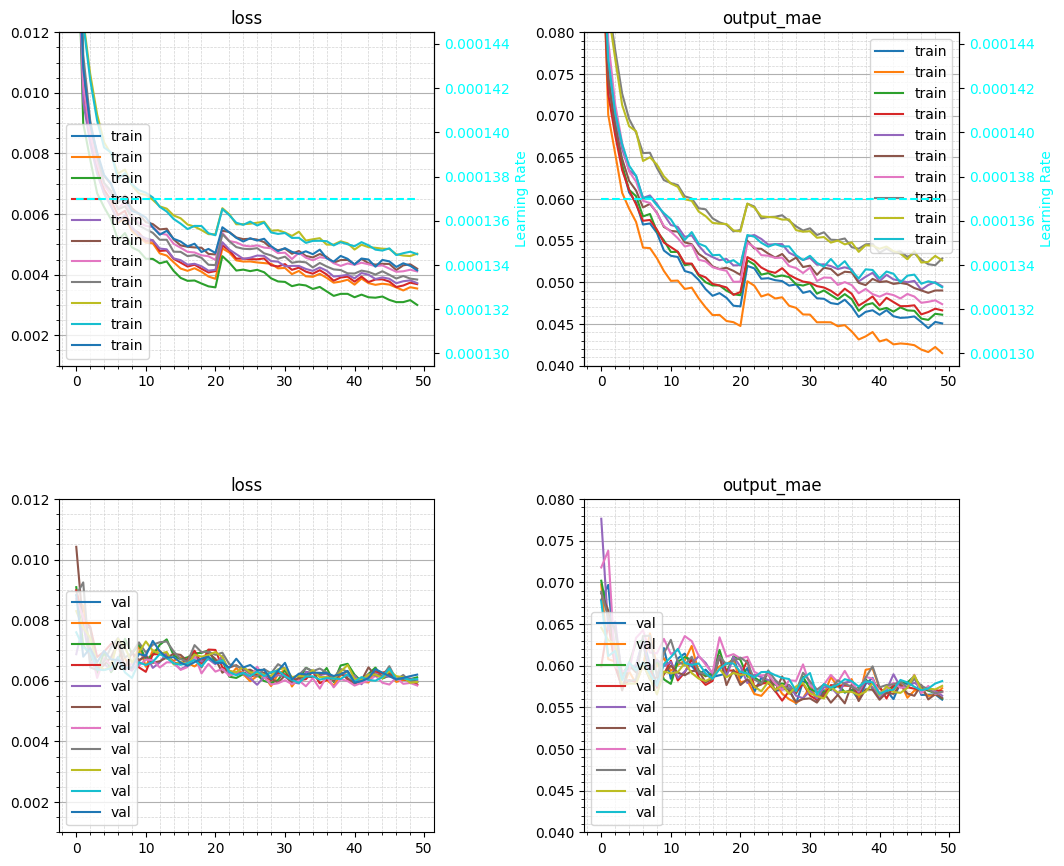

In [73]:
history = history_callback.history
history_1 = history_callback.history

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)


ax = ax.ravel()

keys = list(history.keys())
for i in range(len(keys)):
    print(f"{i}: {keys[i]}")
needed = [0, 1]
groups = [keys[i] for i in needed]

groups[1] = "output_mae"

for key in history.keys():
    for j in range(len(groups)):
        if key.endswith(groups[j]):
            i = j
            if key.startswith("val"):
                i+=2
            label = "val" if key.startswith("val") else "train"
            ax[i].plot(history[key], label=label)
            ax[i].set_title(groups[j])
            ax[i].minorticks_on()
            ax[i].grid(True, axis="y")
            ax[i].grid(which='minor', linestyle='--', linewidth=0.5, color='lightgray')
            ax[i].legend()
            break

ylim_list = [
    (0.001, 0.012),
    (0.04, 0.08),
    (0.001, 0.012),
    (0.04, 0.08),
]
for i in range(len(ax)):
    # l, u = ylim_list[i]
    ax[i].set_ylim(ylim_list[i])

learning_rates = [lr_schedule(epoch, 1) for epoch in range(len(history['loss']))]

for i in range(len(groups)):
    ax_lr = ax[i].twinx()
    ax_lr.plot(learning_rates, color="cyan", label="Learning Rate", linestyle="--")
    ax_lr.set_ylabel("Learning Rate", color="cyan")
    ax_lr.tick_params(axis="y", labelcolor="cyan")


ax[0].legend(loc='lower left')

# ax[1].text(20 ,0,f"OverSampling max {upper}, v2S", rotation=90, ha='center')

# model_details_text = [
#     f"Model details: Batch {batch_size}, LR: {learning_rate}",
#     "EfficientNetV2S",
#     "two paths: ",
#     "GlobalAveragePooling2D+norm+dropout and ",
#     "conv2D(128,(3,3)) -> norm -> flatten",
#     "merge -> norm -> dense(2560) -> dropout",
#     "Split to two 1024 (relu), 512 (relu), 100 (relu), 1",
# ]

# ax[-1].axis("off")
# ax[-2].axis("off")
# ax[-3].axis("off")
# for i in range(len(model_details_text)):
#     ax[-3].text(x=0.5, y=0.9 - i * 0.09, s=model_details_text[i])



plt.savefig(f"{folder_path}/{name_template}.png")

In [74]:
# for layer in base_model.layers[-5:]:  # Freeze all but the last 20 layers
#     layer.trainable = True

# model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#     loss={"angle_output": "mse"},
#     metrics={"angle_output": ["mae"]},
# )

# def lr_schedule_cont(epoch, lr):
#     return lr_schedule(epoch+NUM_OF_EPOCHS, lr)

# for epoch in range(30):
#     print(f"Epoch {epoch+1:2d}: {lr_schedule_cont(epoch, 0):.6f}")

# lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule_cont, verbose=1)

In [75]:
# try:
#     history = model.fit(
#         train_ds,
#         validation_data=val_ds,
#         epochs=20,
#         steps_per_epoch= train_ds_length // batch_size,
#         validation_steps= val_ds_length // batch_size,
#         callbacks=[checkpoint, history_callback, lr_scheduler],
#         verbose=1,
#     )
# except KeyboardInterrupt:
#     print("Stopped early—saving history")
#     with open("training_history.pkl", "wb") as f:
#         pickle.dump(history_callback.history, f)

In [76]:
# name_template = f'{name_template}_cont'

# folder_path = f"Models/{name_template}"

# if not os.path.exists(folder_path):
#     os.makedirs(folder_path)

# filename = f"{folder_path}/{name_template}.keras"
# model.save(filename)
# filename = f"{folder_path}/{name_template}.weights.h5"
# model.save_weights(filename)

# history = history_callback.history

# filename = f"{folder_path}/{name_template}_history.pkl"
# with open(filename, 'wb') as f:
#     pickle.dump(history, f)

In [77]:
# history_2 = history_callback.history

# history = {}

# # Merge using numpy.concatenate
# for key in history_1.keys():
#     history[key] = np.concatenate([history_1[key], history_2[key]])

# history = history_callback.history

# fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)


# ax = ax.ravel()

# keys = list(history.keys())
# print(keys)
# needed = [0, 1]
# groups = [keys[i] for i in needed]

# for key in history.keys():
#     for j in range(len(groups)):
#         if key.endswith(groups[j]):
#             label = "val" if key.startswith("val") else "train"
#             ax[j].plot(history[key], label=label)
#             ax[j].set_title(groups[j])
#             ax[j].minorticks_on()
#             ax[j].grid(True, axis="y")
#             ax[j].grid(which='minor', linestyle='--', linewidth=0.5, color='lightgray')
#             ax[j].legend()
#             break

# ylim_list = [
#     (0.001, 0.015),
#     (0.04, 0.08),
# ]
# for i in range(len(groups)):
#     # l, u = ylim_list[i]
#     ax[i].set_ylim(ylim_list[i])

# learning_rates = [lr_schedule(epoch, 1) for epoch in range(len(history['loss']))]

# for i in range(len(groups)):
#     ax_lr = ax[i].twinx()
#     ax_lr.plot(learning_rates, color="cyan", label="Learning Rate", linestyle="--")
#     ax_lr.set_ylabel("Learning Rate", color="cyan")
#     ax_lr.tick_params(axis="y", labelcolor="cyan")

# # ax[1].text(13 ,0,f"OverSampling max {upper}, v2M", rotation=90, ha='center')

# # model_details_text = [
# #     f"Model details: Batch {batch_size}, LR: {learning_rate}",
# #     "EfficientNetV2S",
# #     "two paths: ",
# #     "GlobalAveragePooling2D+norm+dropout and ",
# #     "conv2D(128,(3,3)) -> norm -> flatten",
# #     "merge -> norm -> dense(2560) -> dropout",
# #     "Split to two 1024 (relu), 512 (relu), 100 (relu), 1",
# # ]

# # ax[-1].axis("off")
# # ax[-2].axis("off")
# # ax[-3].axis("off")
# # for i in range(len(model_details_text)):
# #     ax[-3].text(x=0.5, y=0.9 - i * 0.09, s=model_details_text[i])



# plt.savefig(f"{folder_path}/{name_template}.png")

In [78]:
print(len(history_1['loss']))

50


In [79]:
val_ds = tf.data.Dataset.from_tensor_slices((X_val_path, y_val))
val_ds = val_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(scale_ds, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(resize_ds, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(rephrase_ds, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = configure_for_performance(val_ds, shuffle=False, batch=False)

pred = model.predict(val_ds)

2069/2069 [==============================] - 24s 11ms/step


0.005595932296085362


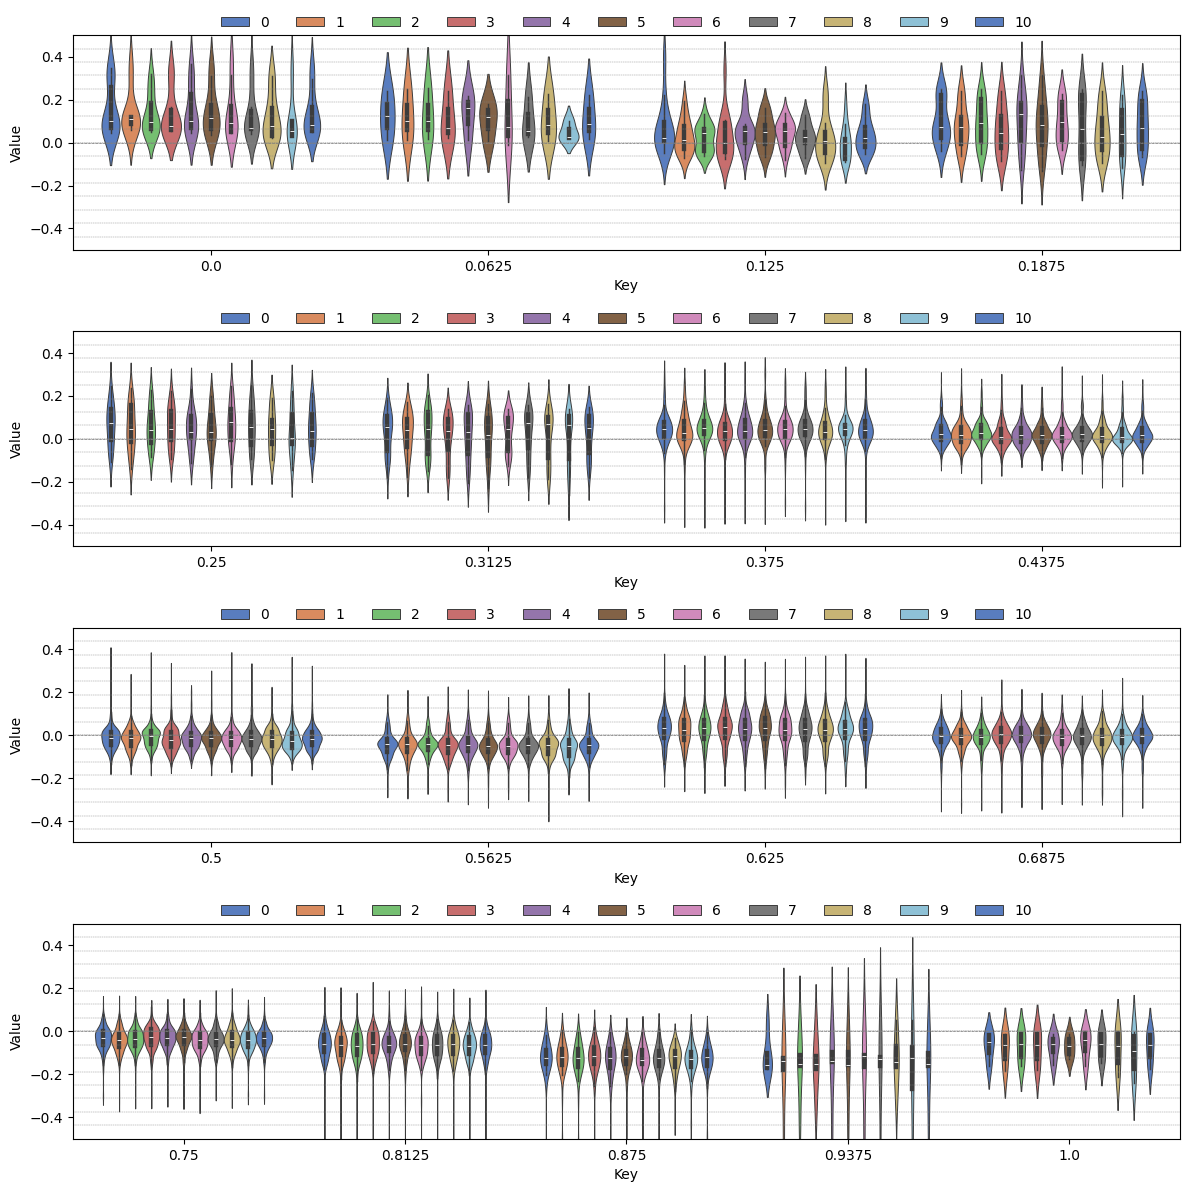

In [90]:
y_pred = []
for key in pred.keys():
    # print(key, end=", ")
    temp = (pred[key][:, 0])
    y_pred.append(temp)

y_pred_mean = np.mean(y_pred, axis=0)

y_pred.append(y_pred_mean)

y_pred = np.array(y_pred)

y_pred = np.where(np.abs(y_pred - 0.5) < 0.1, y_pred, (y_pred - 0.5) * 1.0 + 0.5)

y_pred_ae = y_pred - y_val

diff_dict_list = []
for i in range(len(y_pred)):
    diff_dict = {}

    for key in np.unique(y_val):
        diff_dict[key] = []

    for y_true, y_error in zip(y_val, np.array(y_pred_ae[i, :])):
        diff_dict[y_true].append(y_error)

    diff_dict_list.append(diff_dict)


print(np.mean((y_pred[-1]-y_val)**2))

df = pd.DataFrame([
    (group_idx, k, v) 
    for group_idx, diff_dict in enumerate(diff_dict_list) 
    for k, vals in diff_dict.items() 
    for v in vals
], columns=['Group', 'Key', 'Value'])


ranges = [
    (float('-inf'), 0.25, 'Keys < 0.25'),
    (0.25, 0.5, '0.25 <= Keys < 0.5'),
    (0.5, 0.75, '0.5 <= Keys < 0.75'),
    (0.75, float('inf'), 'Keys >= 0.75')
]

# Create figure with 4 subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharey=True)

# Loop over ranges and plot
for i, (lower, upper, title) in enumerate(ranges):
    # Filter DataFrame for this range
    df_subset = df[(df['Key'] >= lower) & (df['Key'] < upper)]
    
    # Plot violin
    sns.violinplot(x='Key', y='Value', hue='Group', data=df_subset, ax=axes[i], 
                   palette='muted', linewidth=0.7)
    
    # Customize
    axes[i].set_ylim(-0.5, 0.5)
    axes[i].set_xlabel('Key')
    axes[i].set_ylabel('Value')
    axes[i].axhline(y=0, linestyle='--', color='gray', linewidth=0.5)
    ii = 0
    while ii < 0.5:
        axes[i].axhline(y=ii, linestyle='--', color='gray', linewidth=0.3)
        axes[i].axhline(y=-ii, linestyle='--', color='gray', linewidth=0.3)
        ii += 0.0625
    # Make legend horizontal
    axes[i].legend(loc='upper center', ncol=len(df['Group'].unique()), 
                   bbox_to_anchor=(0.5, 1.15), frameon=False)
# Adjust layout
plt.tight_layout()

plt.show()


fig.savefig(f"{folder_path}/{name_template}_distribution.png")



In [81]:
# train_ds = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor))
# train_ds = train_ds.map(image_id_to_path, num_parallel_calls=tf.data.AUTOTUNE)
# train_ds = train_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
# train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
# train_ds = train_ds.map(scale_ds, num_parallel_calls=tf.data.AUTOTUNE)
# train_ds = train_ds.map(rephrase_ds, num_parallel_calls=tf.data.AUTOTUNE)
# train_ds = configure_for_performance(train_ds, shuffle=False, batch=False)

# train_pred = model.predict(train_ds)

In [82]:
# y_pred = []
# for key in train_pred.keys():
#     print(key, end=", ")
#     temp = (train_pred[key][:, 0])
#     y_pred.append(temp)

# y_pred_mean = np.mean(y_pred, axis=0)

# y_pred.append(y_pred_mean)

# y_pred = np.array(y_pred)

# # y_pred = np.clip(y_pred, 0, 1)

# # y_pred = y_pred + np.sign(y_pred - 0.5) * abs(y_pred - 0.5) * 0.3

# y_pred_ae = y_pred - y_train

# diff_dict_list = []
# for i in range(len(y_pred)):
#     diff_dict = {}

#     for key in np.unique(y_train):
#         diff_dict[key] = []

#     for y_true, y_error in zip(y_train, np.array(y_pred_ae[i, :])):
#         diff_dict[y_true].append(y_error)

#     diff_dict_list.append(diff_dict)




# df = pd.DataFrame([
#     (group_idx, k, v) 
#     for group_idx, diff_dict in enumerate(diff_dict_list) 
#     for k, vals in diff_dict.items() 
#     for v in vals
# ], columns=['Group', 'Key', 'Value'])


# ranges = [
#     (float('-inf'), 0.25, 'Keys < 0.25'),
#     (0.25, 0.5, '0.25 <= Keys < 0.5'),
#     (0.5, 0.75, '0.5 <= Keys < 0.75'),
#     (0.75, float('inf'), 'Keys >= 0.75')
# ]

# # Create figure with 4 subplots
# fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharey=True)

# # Loop over ranges and plot
# for i, (lower, upper, title) in enumerate(ranges):
#     # Filter DataFrame for this range
#     df_subset = df[(df['Key'] >= lower) & (df['Key'] < upper)]
    
#     # Plot violin
#     sns.violinplot(x='Key', y='Value', hue='Group', data=df_subset, ax=axes[i], 
#                    palette='muted', linewidth=0.7)
    
#     # Customize
#     axes[i].set_ylim(-0.5, 0.5)
#     axes[i].set_xlabel('Key')
#     axes[i].set_ylabel('Value')
#     axes[i].axhline(y=0, linestyle='--', color='gray', linewidth=0.5)
#     ii = 0
#     while ii < 0.5:
#         axes[i].axhline(y=ii, linestyle='--', color='gray', linewidth=0.3)
#         axes[i].axhline(y=-ii, linestyle='--', color='gray', linewidth=0.3)
#         ii += 0.0625
#     # Make legend horizontal
#     axes[i].legend(loc='upper center', ncol=len(df['Group'].unique()), 
#                    bbox_to_anchor=(0.5, 1.15), frameon=False)
# # Adjust layout
# plt.tight_layout()

# plt.show()


# fig.savefig(f"{folder_path}/{name_template}_train_distribution.png")

# print(np.mean((y_pred[-1]-y_train)**2))